In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier



# Random forests

In [4]:
from util.functions import impute_and_train

df_numeric = pd.read_csv('processed/df_numeric.csv')

df_num = pd.read_csv('processed/df_numeric.csv')

results = impute_and_train(df_num, model)

    

learning with mean imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with median imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with mode imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with KNN imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5


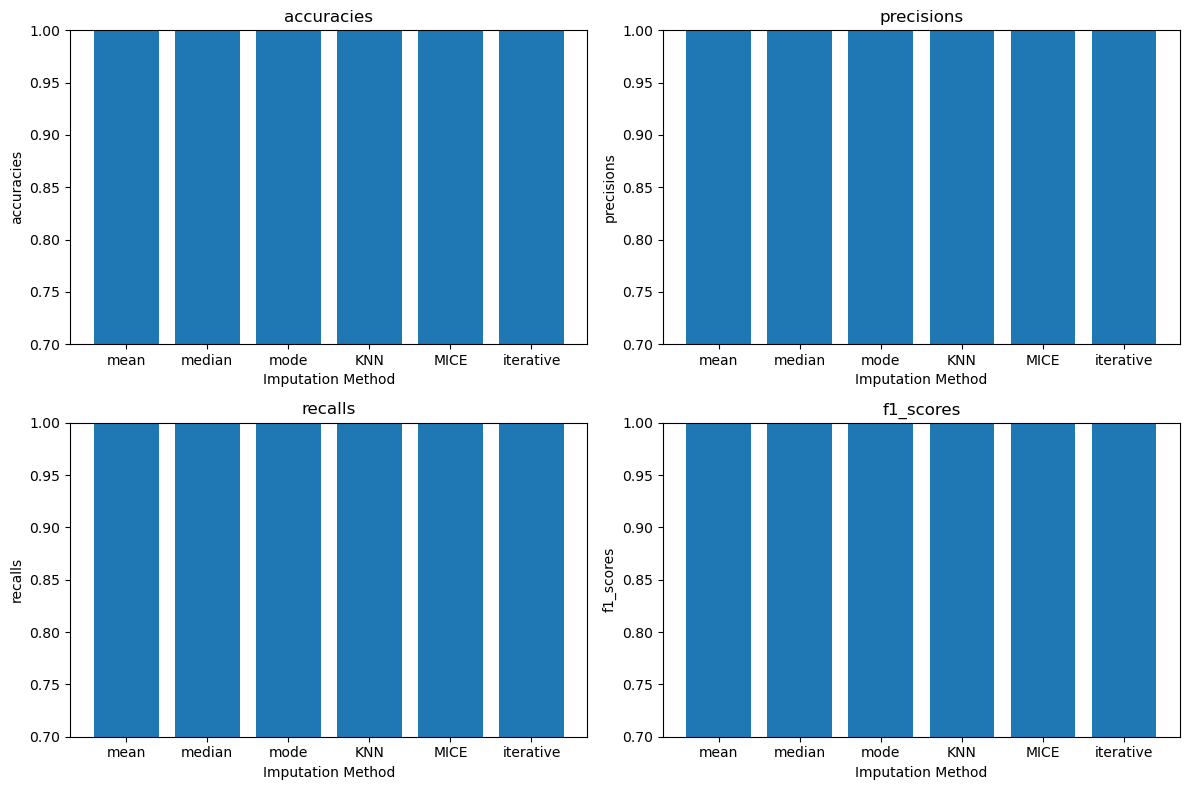

In [5]:
from util.functions import plot_metrics
plot_metrics(results['metrics'])
    

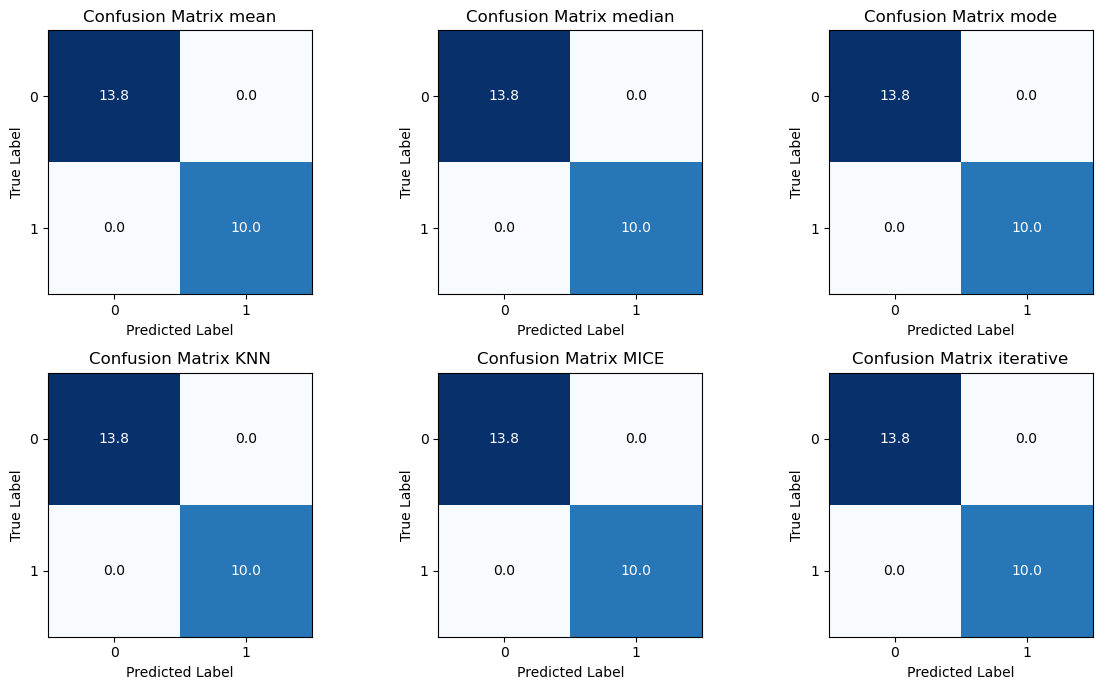

In [6]:
from util.functions import plot_mean_confusion_matrices
plot_mean_confusion_matrices(results['confusion_matrices'])

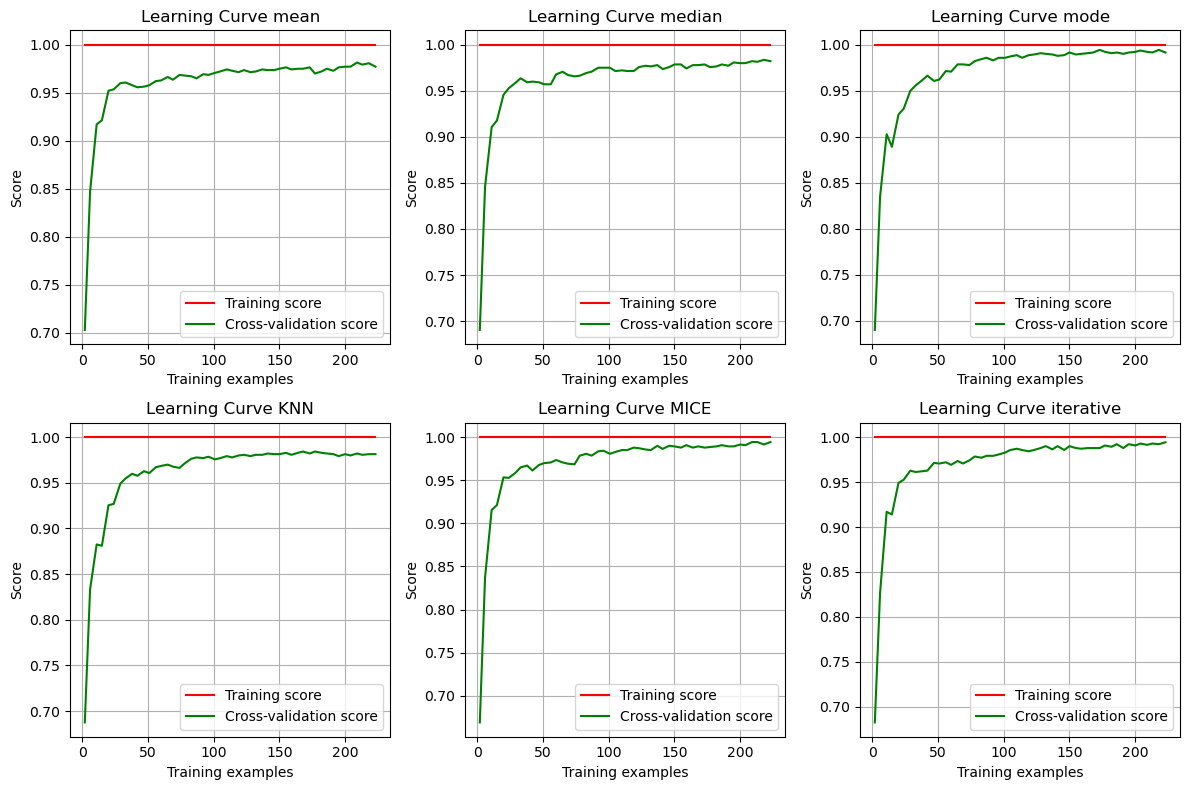

In [7]:
from util.functions import plot_learning_curves
plot_learning_curves(results['learning_curves'])

feature importances for iteration 0


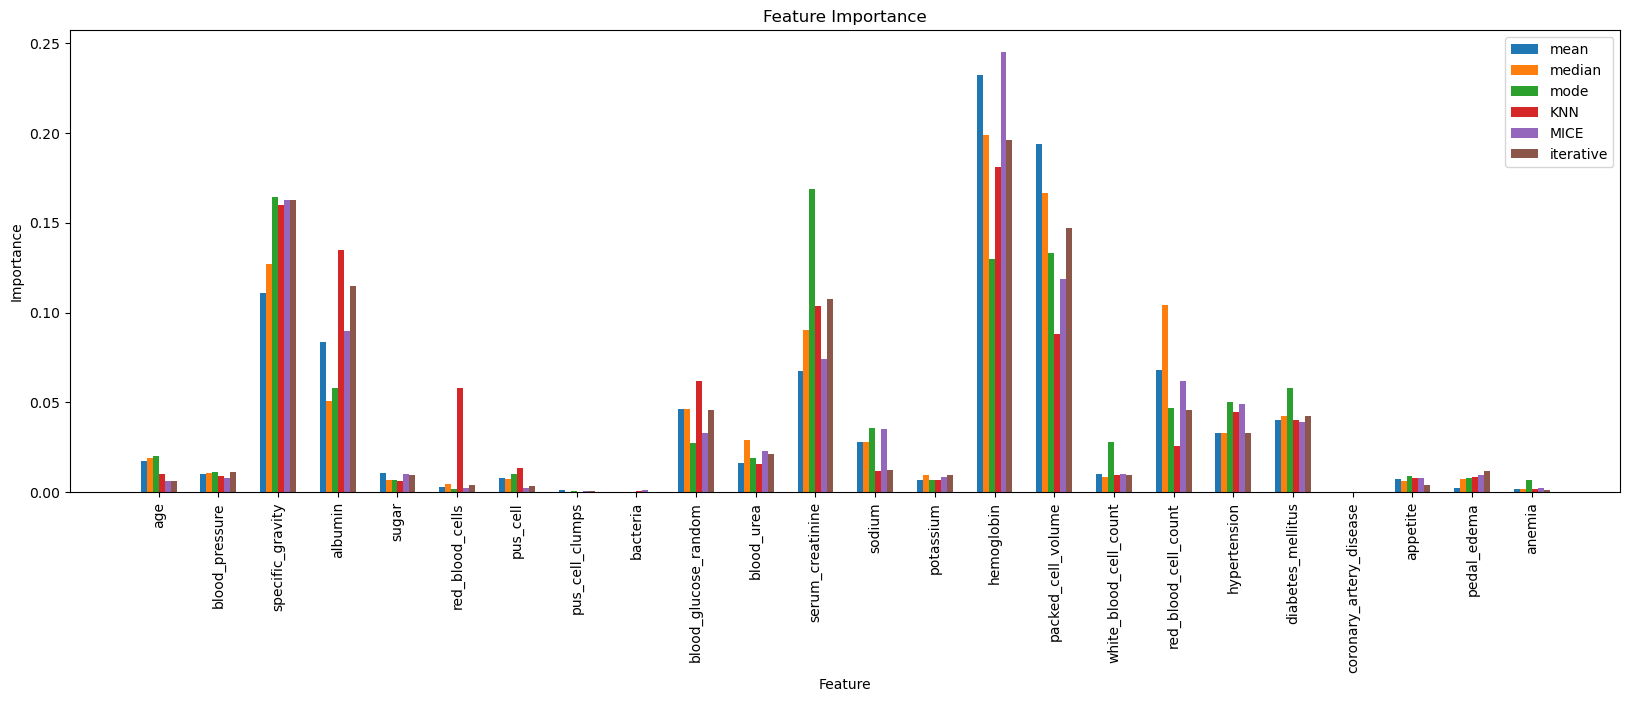

feature importances for iteration 1


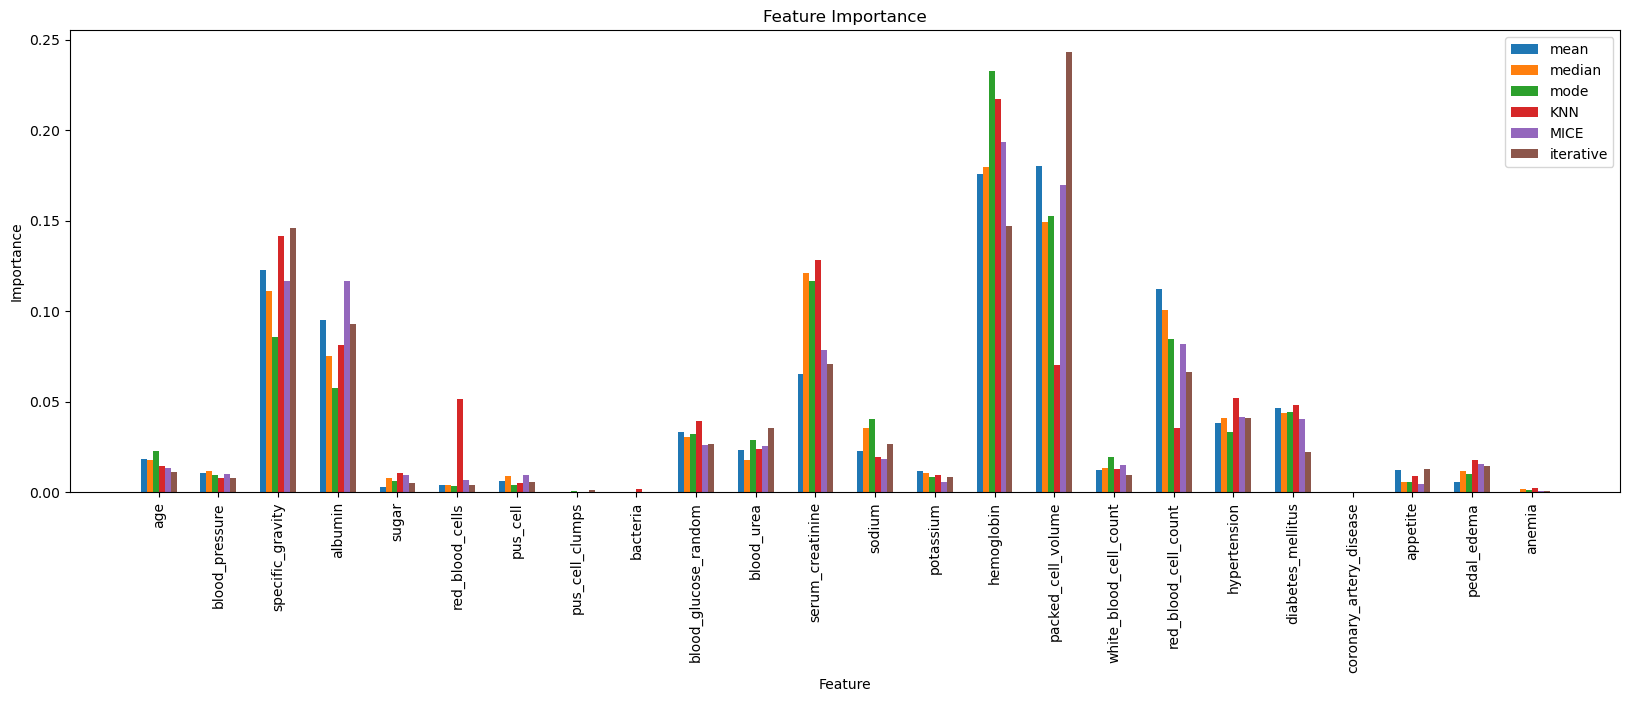

feature importances for iteration 2


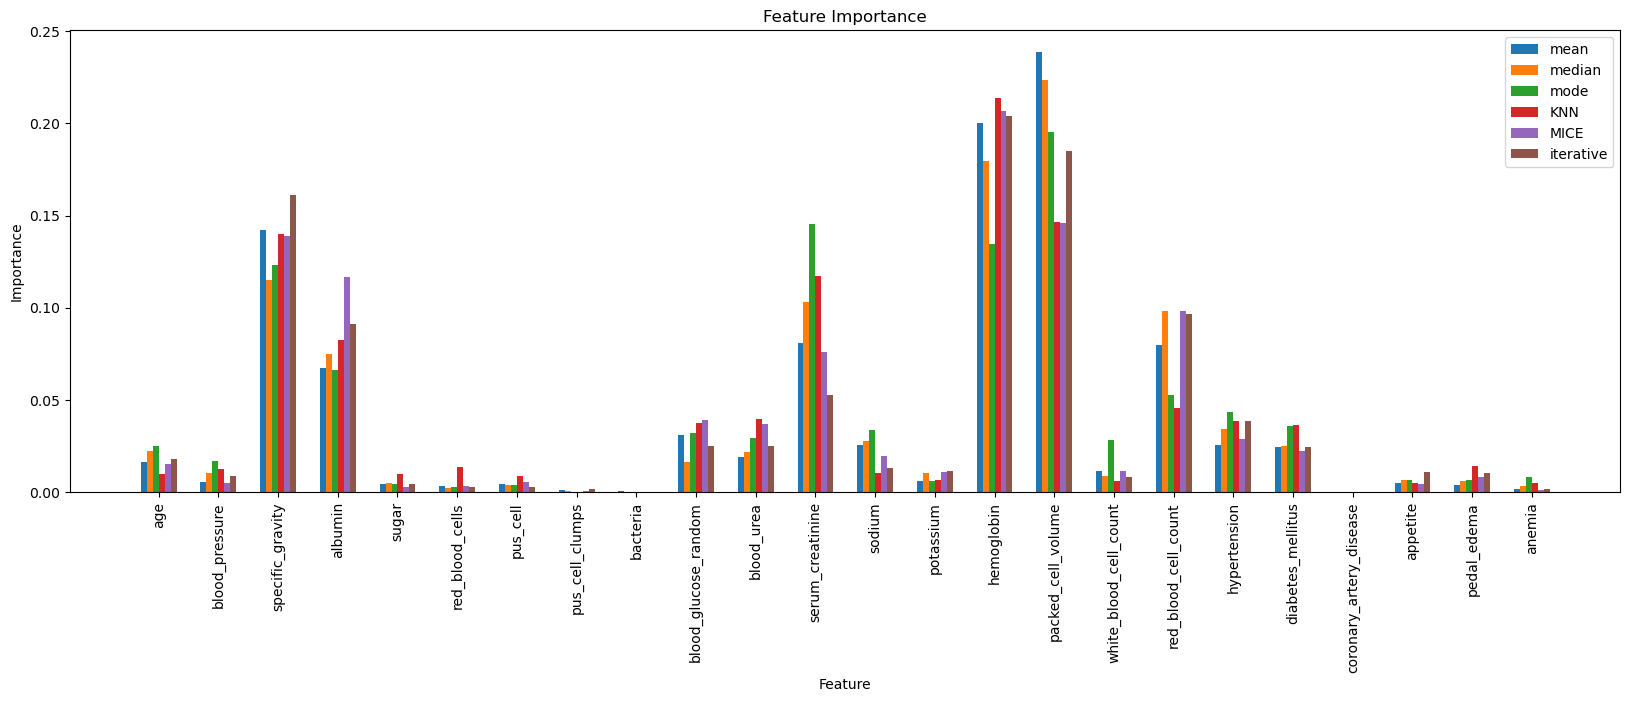

feature importances for iteration 3


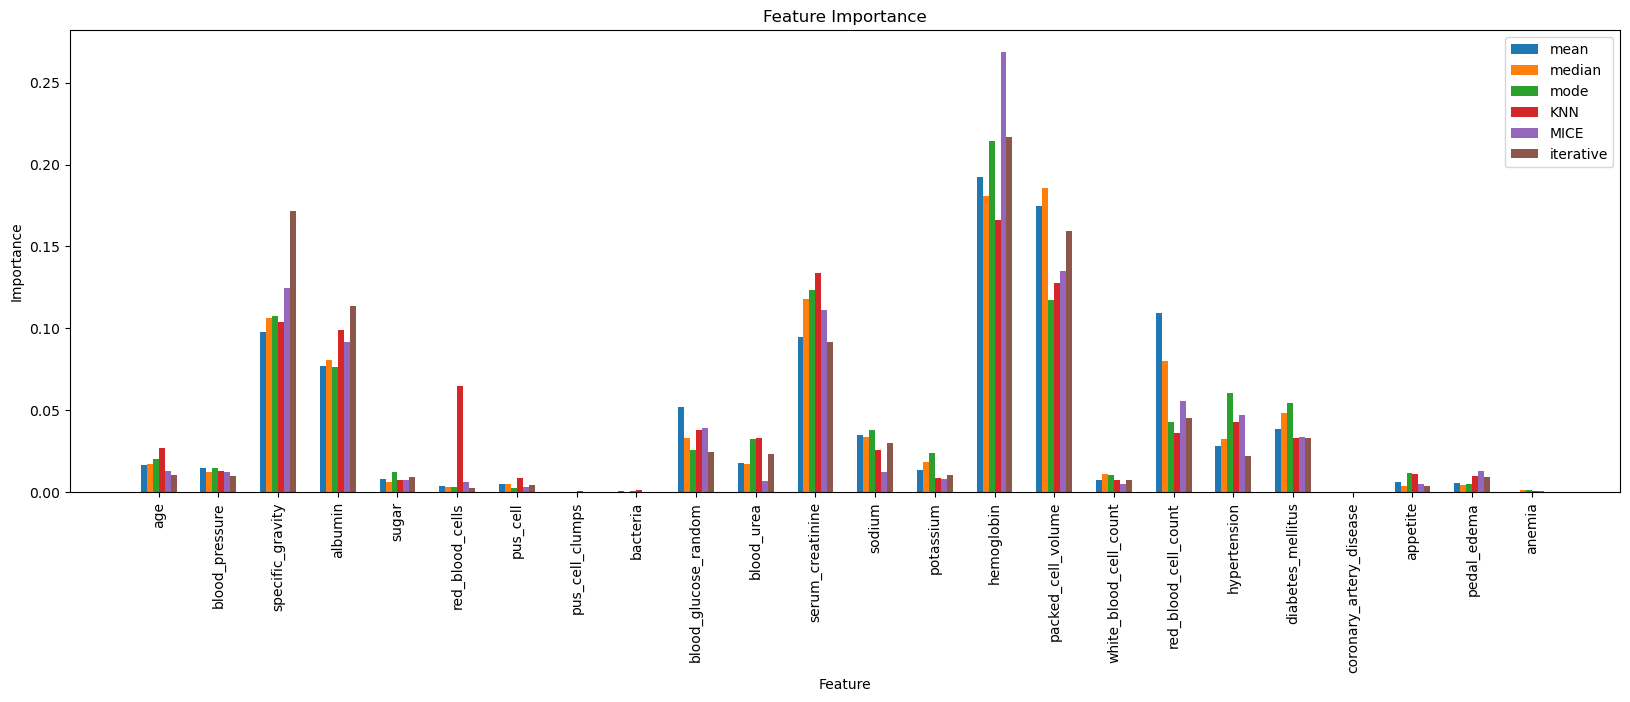

feature importances for iteration 4


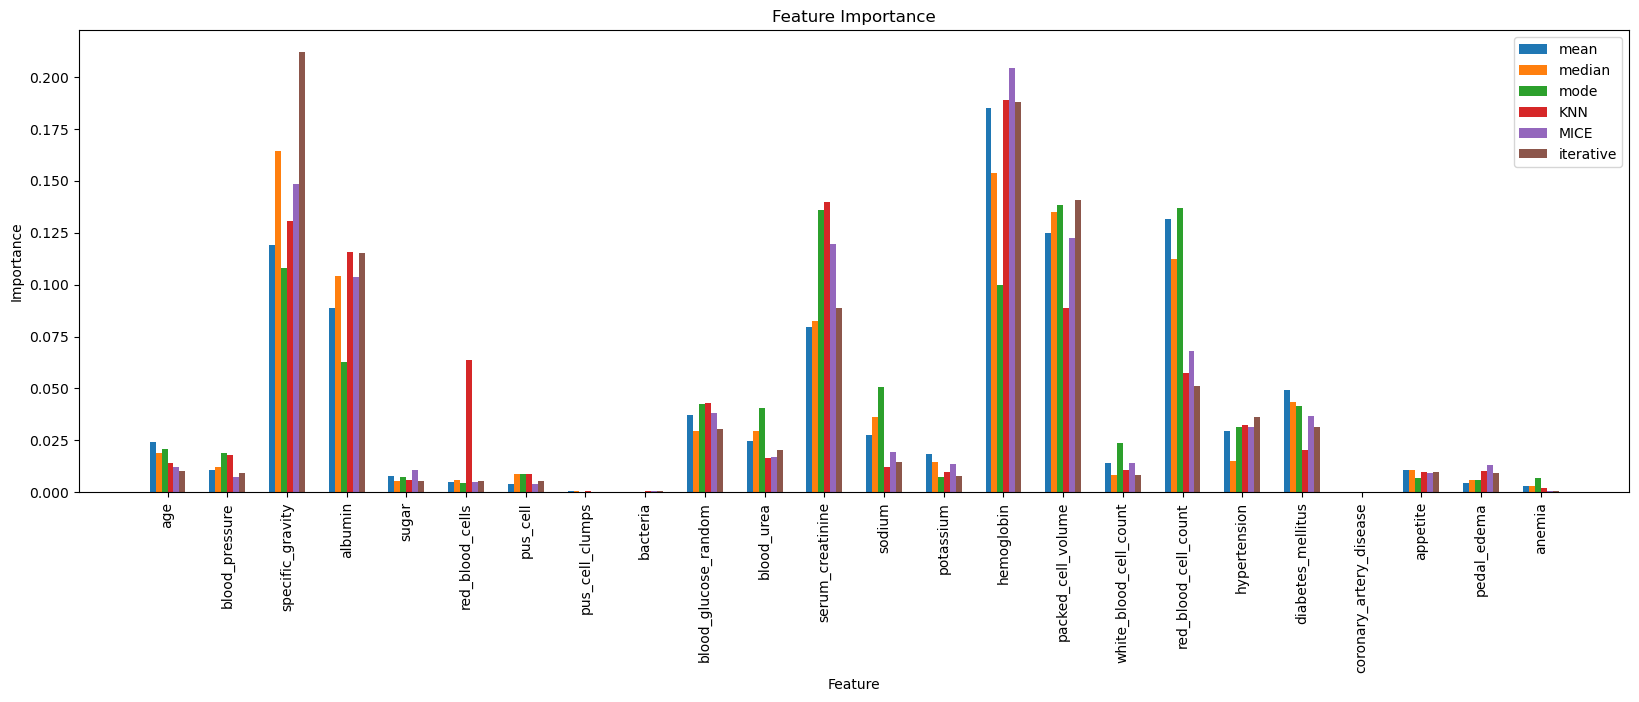

In [8]:
from util.functions import plot_feature_importances
# plot all feature importances as subplots
import pandas as pd
import numpy as np
df_numeric = pd.read_csv('processed/df_numeric.csv')
feature_importances = {}
all_feature_importances = {}
for i in range(5):
    for (name, models) in results['models'].items():
        feature_importances[name] = pd.DataFrame(models[i].feature_importances_, index=df_numeric.drop(columns=['class']).columns, columns=['Importance'])

    print('feature importances for iteration', i)
    plot_feature_importances(feature_importances)


#### Mean feature importances across all folds

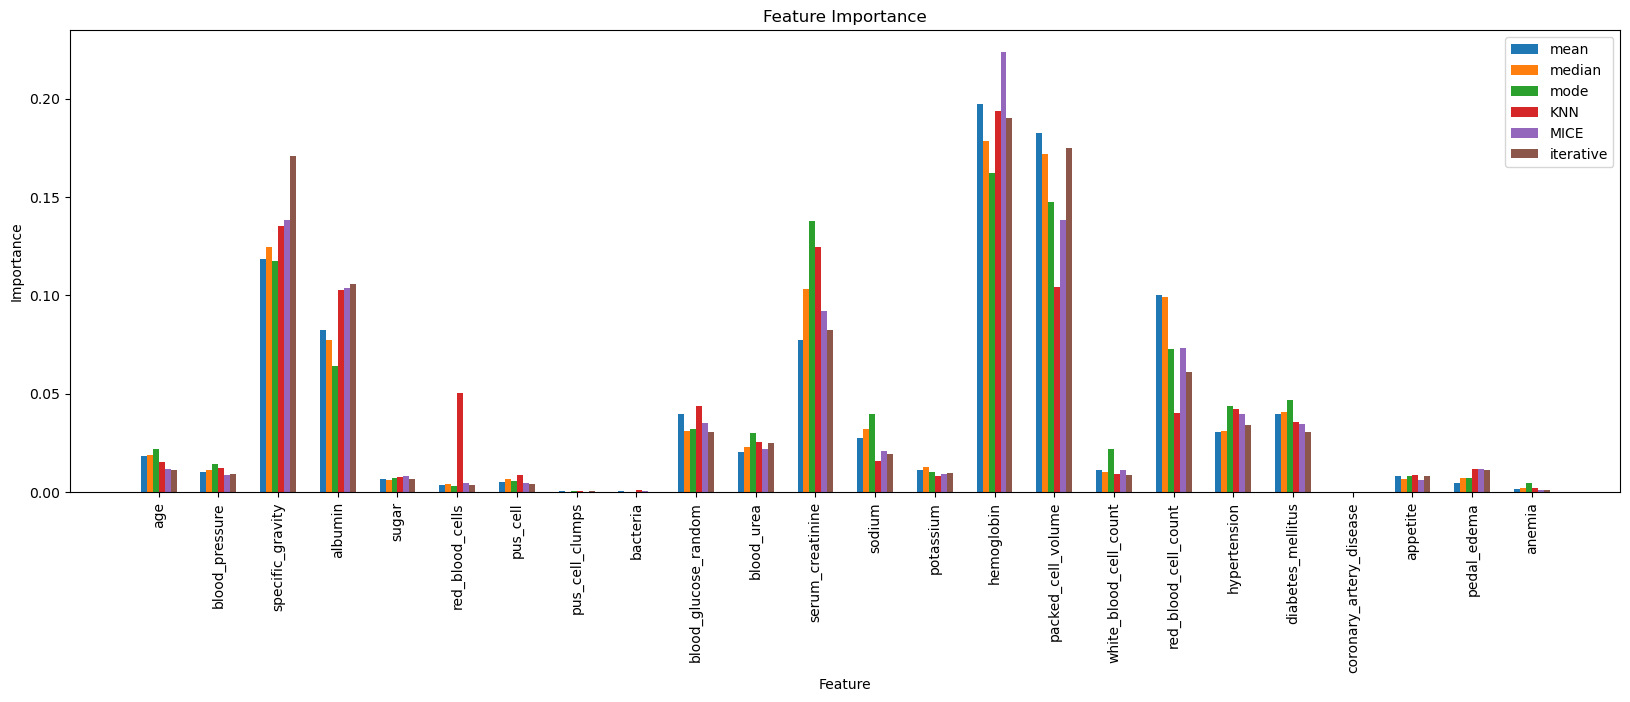

In [9]:
# plot all feature importances as subplots
import pandas as pd
import numpy as np
df_numeric = pd.read_csv('processed/df_numeric.csv')
feature_importances = {}
all_fi = []
for (name, models) in results['models'].items():
    fi = []
    for i, model in enumerate(models):
        fi.append(model.feature_importances_)
        all_fi.append(model.feature_importances_)
    feature_importances[name] = pd.DataFrame(np.mean(fi, axis=0), index=df_numeric.drop(columns=['class']).columns, columns=['Importance'])

mean = np.mean(all_fi, axis=0)
norm = mean / np.sum(mean)
all_fi_df = pd.DataFrame(norm, index=df_numeric.drop(columns=['class']).columns, columns=['Importance'])
all_fi_df.to_csv('results/feature_importances_random_forest.csv', index=True)
plot_feature_importances(feature_importances)

In [11]:
metrics_rf = results['metrics']

metrics_rf = pd.DataFrame(metrics_rf)


for col in metrics_rf.columns:
    print(col)

m = []
for col in metrics_rf.columns:
    m.append(metrics_rf[col])


l = []


for i in range(4):
    for j in m[i]:
        l.append(j)

mean = []

for i in l:
    mean.append(np.mean(i))

print(mean)

print(mean[6:12])

mean_dict = {
    'accuracies': mean[0:6],
    'precisions': mean[6:12],
    'recalls': mean[12:18],
    'f1_scores': mean[18:24]
}

mean_df = pd.DataFrame(mean_dict)


mean_df.to_csv('metrics_rf.csv', index = False)

accuracies
precisions
recalls
f1_scores
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
